In [6]:
import bayleaf as bf
import numpy as np
import pymc3 as pm
%matplotlib inline

### Simulate Data 

In [2]:
N=500; beta = -0.6; rateC = 0.0001;
maxtime = 200
lam =.11; rho = .6
df_sim = bf.simulate.sim_Weibull(N=N,lam =lam, rho = rho, beta = beta, rateC = rateC, maxtime=maxtime)
df_sim.head()


,time,event,x
0,140.623606,1.0,1.0
1,59.537118,1.0,0.0
2,73.526754,1.0,1.0
3,23.701455,1.0,0.0
4,59.714324,1.0,0.0


In [15]:
with bf.Model() as mod:
    bf.ParSurv.from_formula(formula='([time],[event])~x', data=df_sim, family="weibull")
    step = bf.NUTS(target_accept=.99)
    trace = bf.sample(10000,step=step,tune =5000)

100%|██████████| 15000/15000 [01:44<00:00, 143.93it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1265a1550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1254147f0>]], dtype=object)

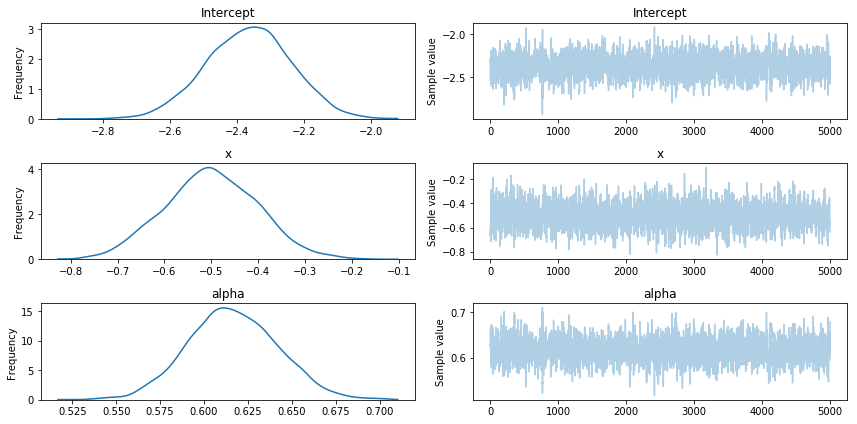

In [16]:
pm.traceplot(trace[5000:])

In [14]:
## Exponentiated intercept corresponds to λ and alpha = rho. Need to change this in code 

0.074273578214333877